In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [13]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(1, fair_probs).sample()     # 抽样一次，每个概率公平0.167，在索引𝑖处的值是采样结果中𝑖出现的次数

tensor([0., 0., 0., 0., 1., 0.])

In [14]:
multinomial.Multinomial(10, fair_probs).sample()    #抽样10次

tensor([3., 1., 2., 2., 2., 0.])

In [18]:
counts = multinomial.Multinomial(10000, fair_probs).sample()    #抽10000次算平均概率
counts / 10000

tensor([0.1688, 0.1674, 0.1680, 0.1738, 0.1575, 0.1645])

tensor([[0., 1., 1., 2., 2., 4.],
        [2., 1., 3., 1., 1., 2.],
        [0., 3., 1., 3., 3., 0.],
        ...,
        [0., 2., 1., 5., 2., 0.],
        [1., 0., 1., 3., 3., 2.],
        [1., 3., 1., 2., 2., 1.]])
tensor([[  0.,   1.,   1.,   2.,   2.,   4.],
        [  2.,   2.,   4.,   3.,   3.,   6.],
        [  2.,   5.,   5.,   6.,   6.,   6.],
        ...,
        [829., 818., 830., 867., 811., 825.],
        [830., 818., 831., 870., 814., 827.],
        [831., 821., 832., 872., 816., 828.]])


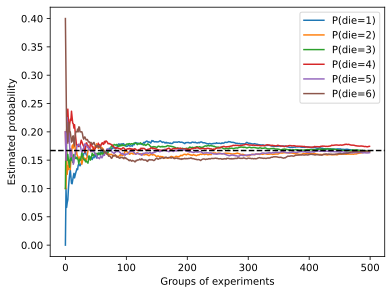

In [20]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))     #每组抽10次，一共500组
print(counts)
cum_counts = counts.cumsum(dim=0)       #第一行不动，将第一行累加到其他行
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();